<a href="https://colab.research.google.com/github/Gibsdevops/Machine-learning-crash-course-/blob/main/knn__model_mglearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.9 MB/s eta 0:00:00


The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”
k-Neighbors classification
In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction
for. The prediction is then simply the known output for this training point. Figure below
illustrates this for the case of classification on the forge dataset:

In [7]:
import mglearn
import matplotlib.pyplot as plt

Text(0, 0.5, 'Second feature')

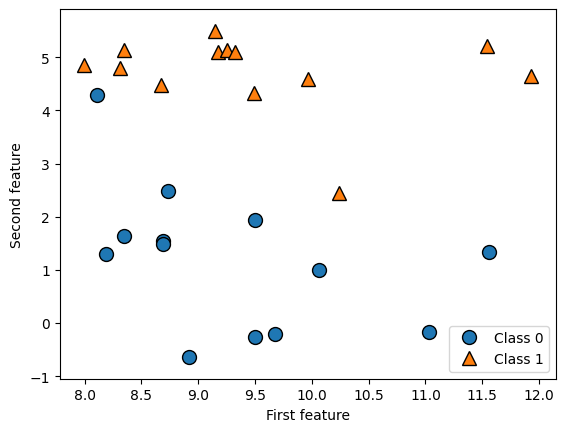

In [8]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

Here, we added three new data points, shown as stars. For each of them, we marked
the closest point in the training set. The prediction of the one-nearest-neighbor algorithm is the label of that point (shown by the color of the cross).

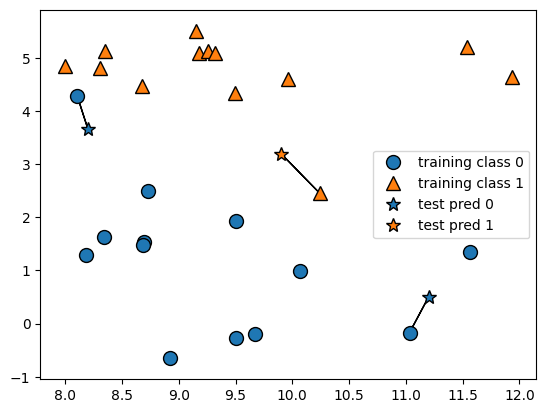

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Instead of considering only the closest neighbor, we can also consider an arbitrary
number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm
comes from. When considering more than one neighbor, we use voting to assign a
label. This means that for each test point, we count how many neighbors belong to
class 0 and how many neighbors belong to class 1. We then assign the class that is
more frequent: in other words, the majority class among the k-nearest neighbors. The
following example the figure below uses the three closest neighbors:

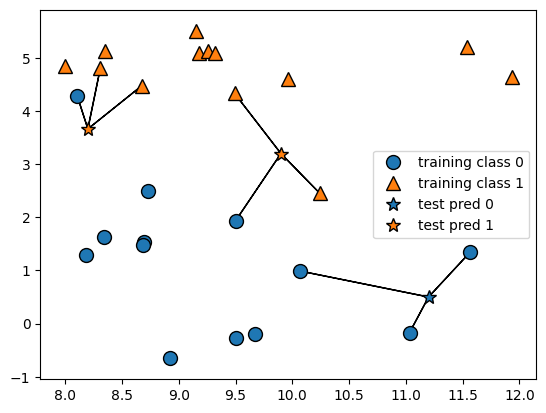

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Now let’s look at how we can apply the k-nearest neighbors algorithm using scikitlearn. First, we split our data into a training and a test set so we can evaluate generalization performance,

In [12]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


Next, we import and instantiate the class. This is when we can set parameters, like the
number of neighbors to use. Here, we set it to 3:


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)


Now, we fit the classifier using the training set. For KNeighborsClassifier this
means storing the dataset, so we can compute neighbors during prediction:


In [16]:
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

To make predictions on the test data, we call the predict method. For each data point
in the test set, this computes its nearest neighbors in the training set and finds the
most common class among these:

In [17]:
print("The test set predictions: {}".format(clf.predict(X_test)))

The test set predictions: [1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the score method with the
test data together with the test labels:

In [19]:
print("test accurancy: {:.2f}".format(clf.score(X_test, y_test)))

test accurancy: 0.86


We see that our model is about 86% accurate, meaning the model predicted the class
correctly for 86% of the samples in the test dataset.


Analyzing KNeighborsClassifier
For two-dimensional datasets, we can also illustrate the prediction for all possible test
points in the xy-plane. We color the plane according to the class that would be
assigned to a point in this region. This lets us view the decision boundary, which is the
divide between where the algorithm assigns class 0 versus where it assigns class 1.

The following code produces the visualizations of the decision boundaries for one,
three, and nine neighbors

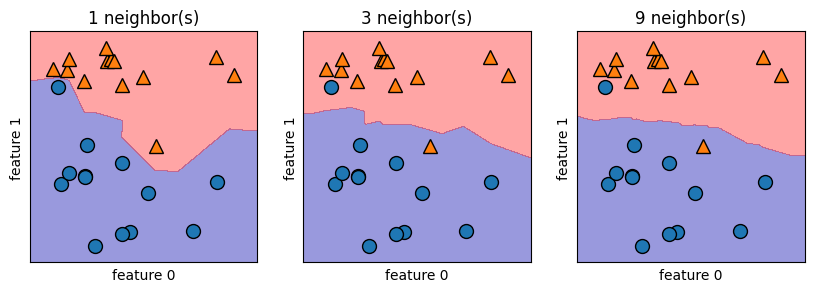

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):

  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")

Decision boundaries created by the nearest neighbors model for different val‐
ues of n_neighbors

As you can see on the left in the figure, using a single neighbor results in a decision
boundary that follows the training data closely. Considering more and more neigh‐
bors leads to a smoother decision boundary